In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import os
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_excel('loan.xlsx')

In [ ]:
df

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,M,34.169998,2.750,owner,given,guard_etc,self_empl,2,0,t,given,232,200,reject
425,F,22.250000,1.250,rent,not_given,unemploye,unemploye,3,0,f,given,280,0,reject
426,M,23.330000,1.500,owner,given,creative_,governmen,1,0,f,given,422,200,accept
427,M,21.000000,4.790,rent,not_given,productio,private_s,2,1,t,given,80,300,accept


In [ ]:
! pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#converting categorical features into numerical
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Res_status'] = encoder.fit_transform(df['Res_status'])
df['Telephone'] = encoder.fit_transform(df['Telephone'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['Job_status'] = encoder.fit_transform(df['Job_status'])
df['Liab_ref'] = encoder.fit_transform(df['Liab_ref'])
df['Acc_ref'] = encoder.fit_transform(df['Acc_ref'])
df['Decision'] = encoder.fit_transform(df['Decision'])

df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,1,50.750000,0.585,0,0,11,6,0,0,0,0,145,0,1
1,1,19.670000,10.000,1,1,4,0,0,0,1,0,140,0,1
2,0,52.830002,15.000,0,0,0,2,5,14,0,0,0,2200,0
3,1,22.670000,2.540,1,1,0,0,2,0,0,0,0,0,0
4,1,29.250000,13.000,0,0,1,0,0,0,0,0,228,0,1


In [ ]:
X = df.drop(columns=['Decision'])
y = df['Decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier()

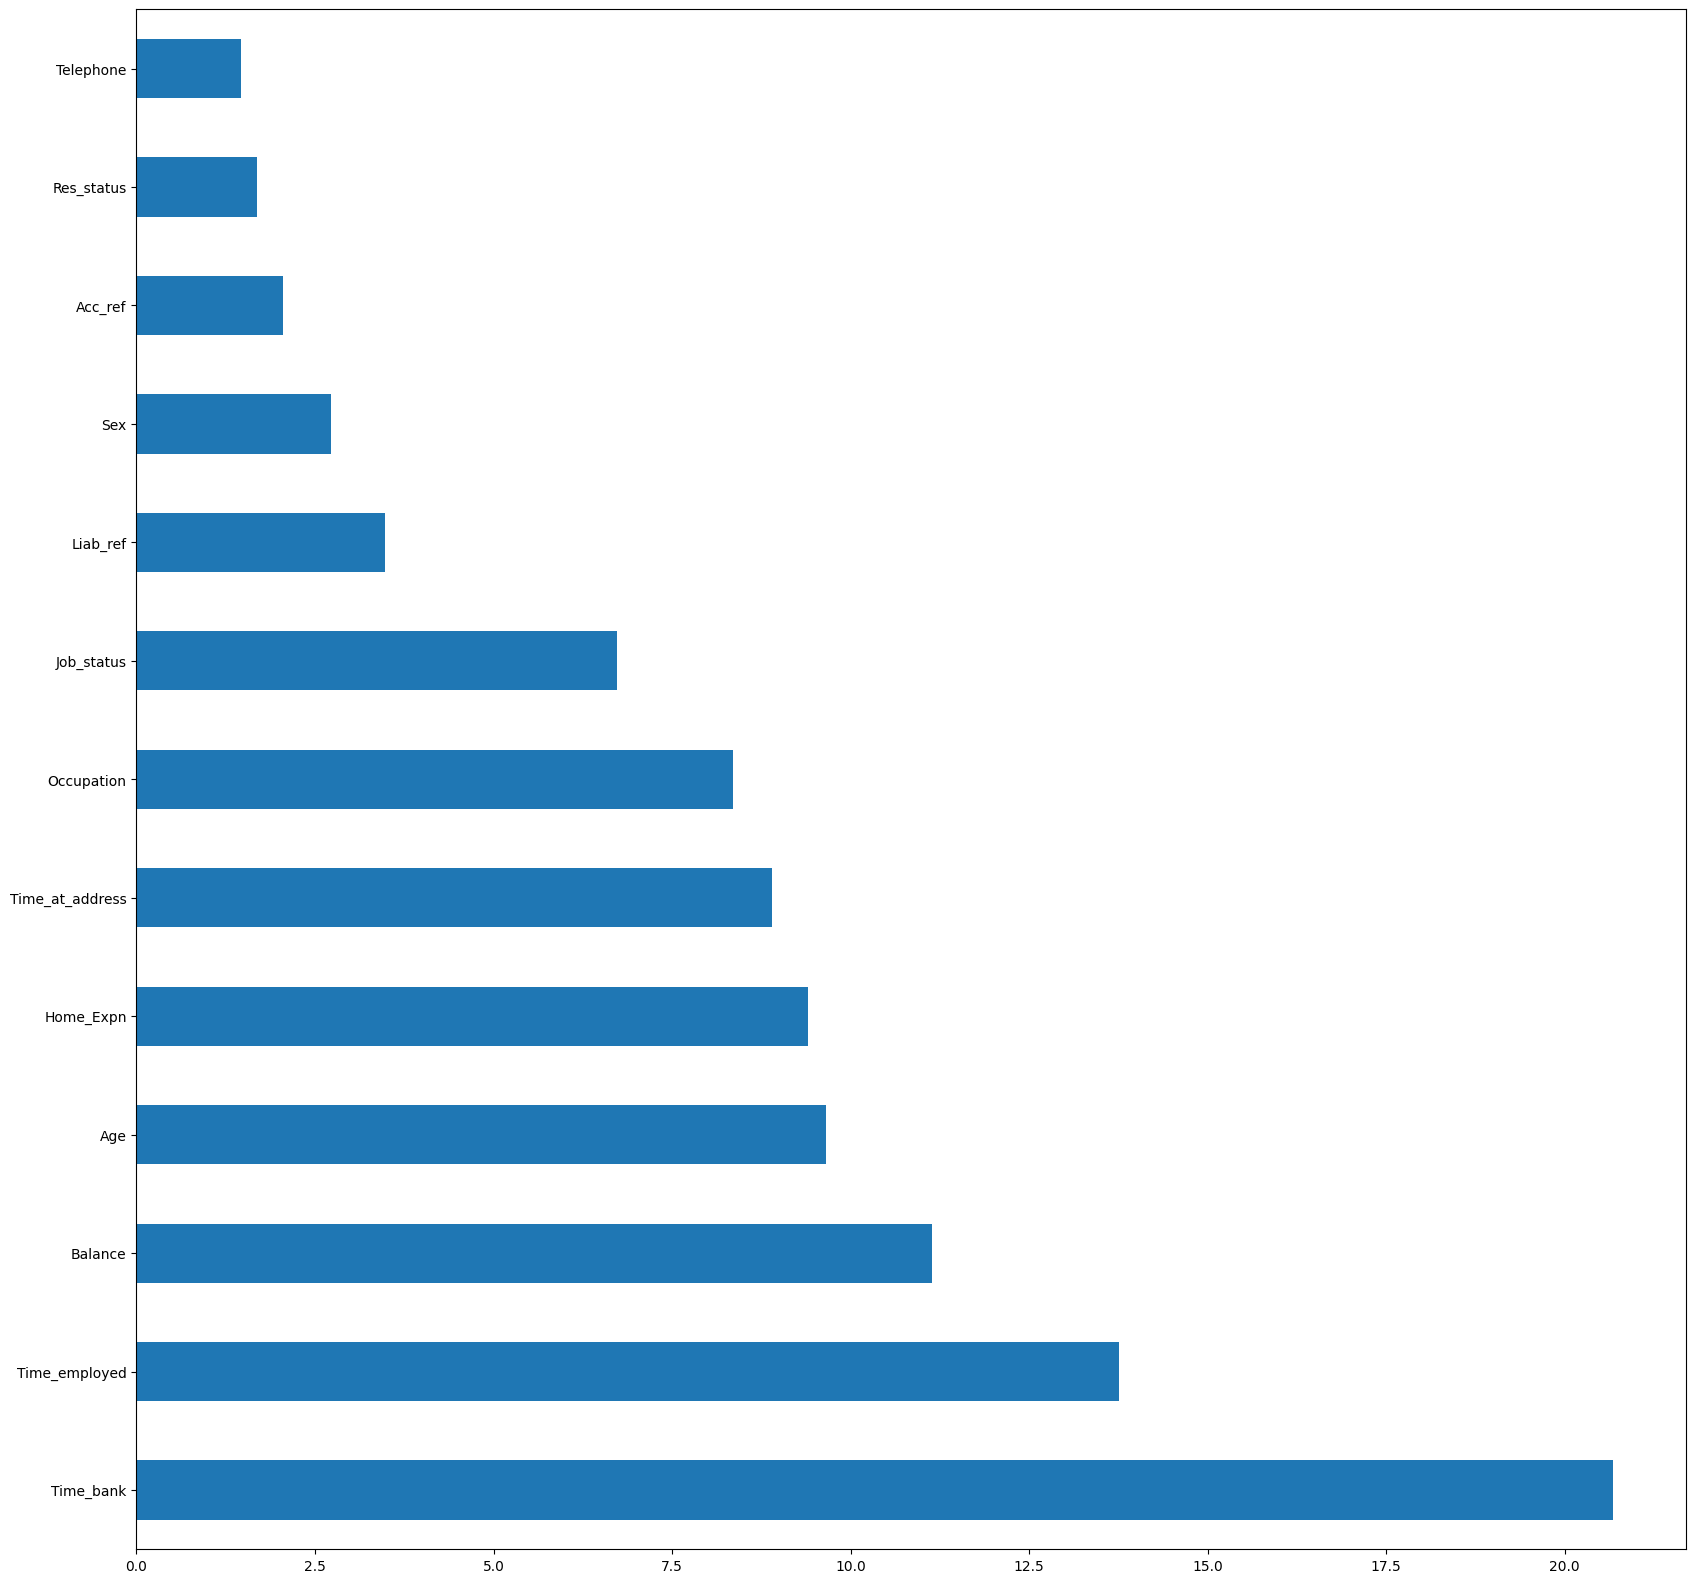

In [ ]:
#Plot graph of feature importance for better visualization
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_*100,index = X_train.columns)
plt.figure(figsize = (20, 20))
feat_importances.nlargest(50).plot(kind = 'barh')
plt.show()

In [ ]:
# display the relative importance of each attribute
print(model.feature_importances_)

[0.02719039 0.09658238 0.08899252 0.01681102 0.01460529 0.08355501
 0.06724134 0.13752616 0.20672091 0.03484525 0.02047128 0.09400295
 0.1114555 ]


In [ ]:
# removing irrelevant features
df = df.drop(["Res_status", "Acc_ref", "Telephone", "Sex", "Liab_ref"], axis = 1)
df.head()

,Age,Time_at_address,Occupation,Job_status,Time_employed,Time_bank,Home_Expn,Balance,Decision
0,50.750000,0.585,11,6,0,0,145,0,1
1,19.670000,10.000,4,0,0,0,140,0,1
2,52.830002,15.000,0,2,5,14,0,2200,0
3,22.670000,2.540,0,0,2,0,0,0,0
4,29.250000,13.000,1,0,0,0,228,0,1


In [ ]:
df = pd.get_dummies(df, columns = ["Occupation", "Job_status"])
print(df)

           Age  Time_at_address  Time_employed  Time_bank  Home_Expn  Balance  \
0    50.750000            0.585              0          0        145        0   
1    19.670000           10.000              0          0        140        0   
2    52.830002           15.000              5         14          0     2200   
3    22.670000            2.540              2          0          0        0   
4    29.250000           13.000              0          0        228        0   
..         ...              ...            ...        ...        ...      ...   
424  34.169998            2.750              2          0        232      200   
425  22.250000            1.250              3          0        280        0   
426  23.330000            1.500              1          0        422      200   
427  21.000000            4.790              2          1         80      300   
428  27.750000            1.290              0          0        140        0   

     Decision  Occupation_0

In [ ]:
X = df.drop(columns=['Decision'])
y = df['Decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=10)


Epoch 1/50
28/28 [==============================] - 1s 10ms/step - loss: 54.6389 - accuracy: 0.4015 - val_loss: 15.3240 - val_accuracy: 0.3188
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 6.5139 - accuracy: 0.5073 - val_loss: 3.8671 - val_accuracy: 0.5942
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 4.0745 - accuracy: 0.6460 - val_loss: 3.0938 - val_accuracy: 0.6232
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 2.9464 - accuracy: 0.5693 - val_loss: 2.3818 - val_accuracy: 0.5362
Epoch 5/50
28/28 [==============================] - 0s 4ms/step - loss: 2.3035 - accuracy: 0.6022 - val_loss: 1.8665 - val_accuracy: 0.5362
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 1.8256 - accuracy: 0.5985 - val_loss: 1.5196 - val_accuracy: 0.5362
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 1.5252 - accuracy: 0.6022 - val_loss: 1.1783 - val_accuracy: 0.6377
Epoch 8/50
28/28 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(recall * 100))


3/3 [==============================] - 0s 3ms/step
Accuracy: 72.09%
Precision: 68.63%
Recall: 81.40%
F1-score: 81.40%
